In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from matplotlib import rc
plt.style.use('fivethirtyeight')
rc('font', family='AppleGothic')

발표 내용은
1. EDA 과정(시각화)
2. 데이터 전처리 과정(코드공유, 수행한 전처리 이유)
3. 쓴 모델에 대한 설명(이유와 간략한 모델소개)
4. Parameter tuning(과정) 
5. 성능평가
6. Q&A (논의와 토론)
입니다.

데이터 : 국가별 자살 인구수 통계
train set 변수

country 
year 
sex 
age 
suicides_no 
population 
suicides/100k_pop 
country_year
HDI_for_year 
gdp_for_year
gdp_per_capital
generation

변수설명은 따로 안하겠습니다. 변수들이 직관적입니다.

문제: train set에는 1985년부터 2014년까지의 국가 별 자살 인구수 통계가
나와 있습니다. 이 데이터를 가지고 다음 해 국가 별 자살 인구수를 예측하는 문제입니다.

TARGET : suicides_no
평가 지표 : RMSE

※project 주의점
국가 별로 나이나 연도에 따라 자살자 수가 흩어져 있습니다.
국가 별 자살자 총합 예측치를 보내주세요.
sample set처럼 보내주세요(sample set y_pred는 그냥 랜덤값입니다.)

궁금한점은 공동대표 이예찬에게 문의주세요

In [94]:
glob.glob("*.csv")

['sample.csv', 'train.csv', 'test_mini.csv']

In [95]:
sample = pd.read_csv("sample.csv")
sample.head(5)

,country,y_pred
0,Albania,35.977640
1,Antigua and Barbuda,8.352893
2,Argentina,10.157314
3,Armenia,27.624467
4,Aruba,69.397970


In [96]:
data = pd.read_csv("train.csv")
data.head(10)

,country,year,sex,age,suicides_no,population,suicides_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capital,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [97]:
data.age = data.age.map(lambda x: x.split(" ")[0])

## 데이터 확인

In [98]:
data.isnull().sum()
# 인간개발지수(HDI)는 국제연합개발계획(UNDP)이 매년 문해율과 평균수명, 1인당 실질국민소득 등을 토대로 각 나라의 선진화 정도를 평가하는 수치

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides_100k_pop        0
country_year             0
HDI_for_year         18552
gdp_for_year             0
gdp_per_capital          0
generation               0
dtype: int64

In [99]:
data.age.unique() # 5살부터 10년 단위.

array(['15-24', '35-54', '75+', '25-34', '55-74', '5-14'], dtype=object)

In [100]:
len(data.country.unique()) # 나라는 100개

100

# 연령대별 

In [101]:
data.groupby(['age'])['population'].sum()

age
15-24     8360976411
25-34     8136211692
35-54    13812601109
5-14      8152056904
55-74     8416594633
75+       2536957859
Name: population, dtype: int64

In [102]:
data.groupby(['age'])['suicides_no'].sum()

age
15-24     785506
25-34    1089724
35-54    2375077
5-14       50583
55-74    1600140
75+       628147
Name: suicides_no, dtype: int64

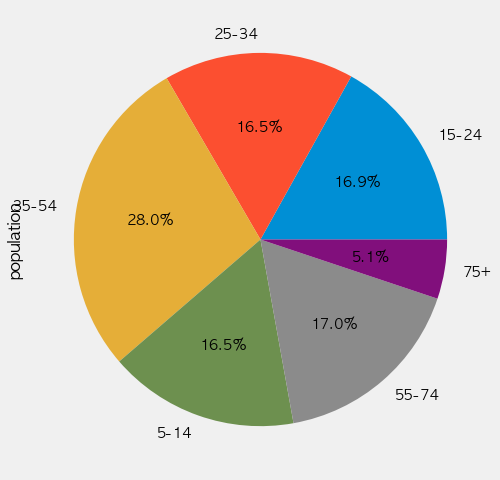

In [103]:
data.groupby(['age'])['population'].sum().plot('pie',figsize=(15,8),autopct = '%1.1f%%')

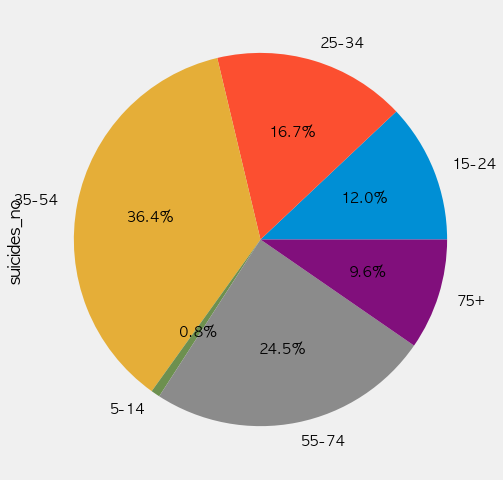

In [104]:
data.groupby(['age'])['suicides_no'].sum().plot('pie',figsize=(15,8),autopct = '%1.1f%%')

# 성별

In [105]:
data.groupby(['sex'])['population'].sum()

sex
female    25297635702
male      24117762906
Name: population, dtype: int64

In [106]:
data.groupby(['sex'])['suicides_no'].sum()

sex
female    1508758
male      5020419
Name: suicides_no, dtype: int64

# 세대별

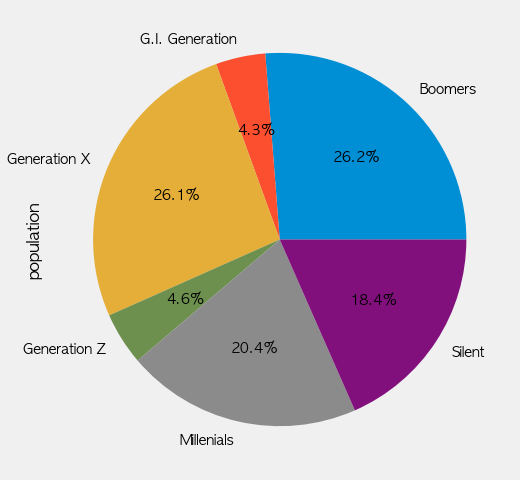

In [107]:
data.groupby(['generation'])['population'].sum().plot('pie',figsize=(15,8),autopct = '%1.1f%%')

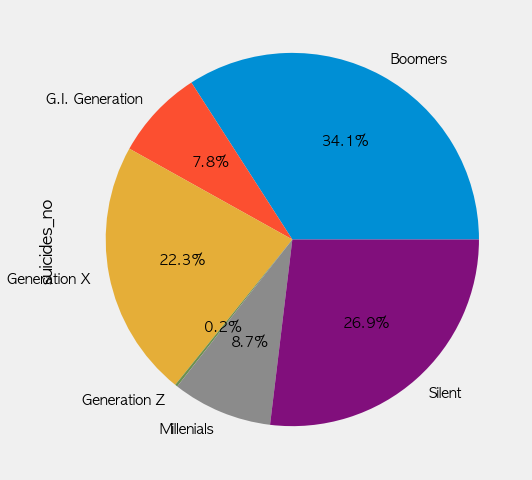

In [108]:
data.groupby(['generation'])['suicides_no'].sum().plot('pie',figsize=(15,8), autopct = '%1.1f%%')

In [109]:
temp1 = data.groupby(['sex','generation'])[['population','suicides_no']].sum()
temp1

population  suicides_no
sex    generation                              
female Boomers          6581641050       446968
       G.I. Generation  1273832910       176653
       Generation X     6405551928       292731
       Generation Z     1102275663         5448
       Millenials       4935620723       121715
       Silent           4998713428       465243
male   Boomers          6382219972      1779227
       G.I. Generation   852369814       333356
       Generation X     6503270350      1163009
       Generation Z     1154629846         8777
       Millenials       5129978099       444520
       Silent           4095294825      1291530

In [120]:
data.groupby(['sex','age'])[['population','suicides_no']].sum()

population  suicides_no
sex    age                           
female 15-24  4107407695       170170
       25-34  4041632654       202185
       35-54  6982792791       489125
       5-14   3987486692        16304
       55-74  4550910425       416036
       75+    1627405445       214938
male   15-24  4253568716       615336
       25-34  4094579038       887539
       35-54  6829808318      1885952
       5-14   4164570212        34279
       55-74  3865684208      1184104
       75+     909552414       413209

In [129]:
data.age.unique()

array(['15-24', '35-54', '75+', '25-34', '55-74', '5-14'], dtype=object)

In [131]:
age_c = {}
age_c['5-14'] = 0
age_c['15-24'] = 1
age_c['25-34'] = 2
age_c['35-54'] = 3
age_c['55-74'] = 4
age_c['75+'] = 5

In [132]:
data.age = data.age.map(lambda x: age_c[x])

In [134]:
age_c

{'5-14': 0, '15-24': 1, '25-34': 2, '35-54': 3, '55-74': 4, '75+': 5}

In [138]:
data.generation.unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [139]:
pd.crosstab(data.age,data.generation,margins=True)
# 동일한 정보를 다른 범주로 나눈 것에 불과한 거 같은데.. 둘 중 하나는 버려야 하지 않을까

generation,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent,All
age,,,,,,,
0,0,0,630,1346,2510,0,4486
1,0,0,2114,0,2372,0,4486
2,1154,0,2682,0,650,0,4486
3,3030,0,826,0,0,630,4486
4,650,630,0,0,0,3206,4486
5,0,2114,0,0,0,2372,4486
All,4834,2744,6252,1346,5532,6208,26916


In [141]:
data

,country,year,sex,age,suicides_no,population,suicides_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capital,generation
0,Albania,1987,male,1,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,3,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,1,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,5,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,2,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,5,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,3,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,2,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,4,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,0,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


# 연도별 추이

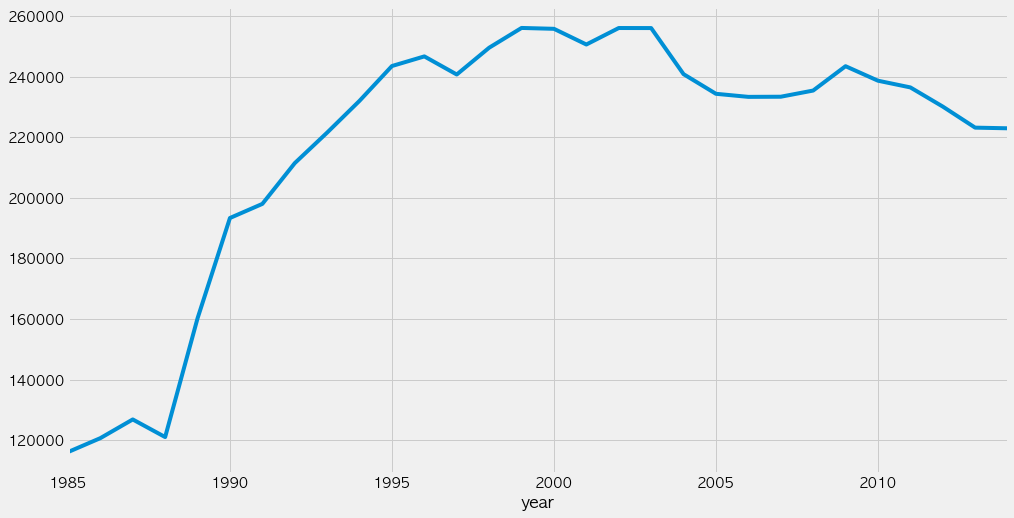

In [110]:
data.groupby(['year'])['suicides_no'].sum().plot(figsize=(15,8))
# 갑자기 크게 뛰는 이유는? * 결측치 존재 가능성

In [111]:
data.groupby(['year'])['suicides_no'].sum()
# 88 ~ 89년 사이 데이터

year
1985    116063
1986    120670
1987    126842
1988    121026
1989    160244
1990    193361
1991    198020
1992    211473
1993    221565
1994    232063
1995    243544
1996    246725
1997    240745
1998    249591
1999    256119
2000    255832
2001    250652
2002    256095
2003    256079
2004    240861
2005    234375
2006    233361
2007    233408
2008    235447
2009    243487
2010    238702
2011    236484
2012    230160
2013    223199
2014    222984
Name: suicides_no, dtype: int64

In [112]:
data.query('year == 1988 or year == 1989').groupby(['sex','year'])['suicides_no'].sum()

sex     year
female  1988     33015
        1989     41361
male    1988     88011
        1989    118883
Name: suicides_no, dtype: int64

In [119]:
## suicides_no가 0인 값을 어디까지 믿어야 하는가...? 일단 데이터에 문제는 없다고 전제해야 할 거 같다.
data.loc[data.suicides_no==0]
#[['country','year']]

,country,year,sex,age,suicides_no,population,suicides_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capital,generation
9,Albania,1987,female,5-14,0,311000,0.0,Albania1987,NaN,"2,156,624,900",796,Generation X
10,Albania,1987,female,55-74,0,144600,0.0,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
11,Albania,1987,male,5-14,0,338200,0.0,Albania1987,NaN,"2,156,624,900",796,Generation X
22,Albania,1988,female,5-14,0,317200,0.0,Albania1988,NaN,"2,126,000,000",769,Generation X
23,Albania,1988,male,5-14,0,345000,0.0,Albania1988,NaN,"2,126,000,000",769,Generation X
33,Albania,1989,female,5-14,0,321900,0.0,Albania1989,NaN,"2,335,124,988",833,Generation X
34,Albania,1989,female,75+,0,37000,0.0,Albania1989,NaN,"2,335,124,988",833,G.I. Generation
35,Albania,1989,male,5-14,0,349700,0.0,Albania1989,NaN,"2,335,124,988",833,Generation X
44,Albania,1992,female,5-14,0,336700,0.0,Albania1992,NaN,"709,452,584",251,Millenials
45,Albania,1992,female,75+,0,38700,0.0,Albania1992,NaN,"709,452,584",251,G.I. Generation


In [91]:
data.query('year == 1988 or year == 1989').groupby(['year','country'])['suicides_no'].sum()

year  country            
1988  Albania                   63
      Antigua and Barbuda        0
      Argentina               2354
      Australia               2172
      Austria                 1851
      Bahrain                   14
      Barbados                  12
      Belgium                 1996
      Brazil                  4466
      Bulgaria                1452
      Canada                  3510
      Chile                    697
      Colombia                 912
      Costa Rica               138
      Ecuador                  466
      Finland                 1402
      France                 11599
      Greece                   403
      Grenada                    4
      Guatemala                174
      Guyana                    56
      Iceland                   35
      Ireland                  266
      Israel                   303
      Italy                   4381
      Jamaica                    5
      Japan                  22676
      Luxembourg             

# corr btwn features 

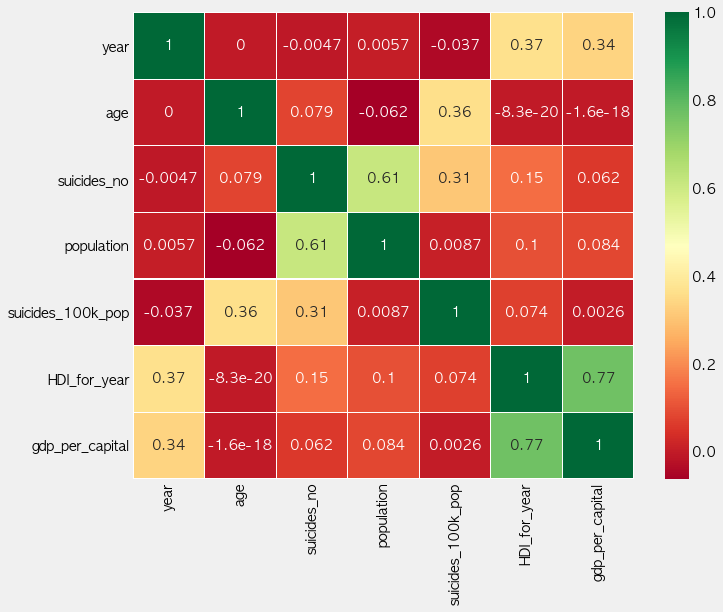

In [137]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths = .2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [152]:
data.groupby(['country','year']).size().to_frame('test')
# 나라마다 누락연도가 있다.

test
country             year      
Albania             1987    12
                    1988    12
                    1989    12
                    1992    12
                    1993    12
                    1994    12
                    1995    12
                    1996    12
                    1997    12
                    1998    12
                    1999    12
                    2000    12
                    2001    12
                    2002    12
                    2003    12
                    2004    12
                    2005    12
                    2006    12
                    2007    12
                    2008    12
                    2009    12
                    2010    12
Antigua and Barbuda 1985    12
                    1986    12
                    1987    12
                    1988    12
                    1989    12
                    1990    12
                    1991    12
                    1992    12
...                        ...
Uruguay             2006    12
                    2007    12
                    2008    12
                    2009    12
                    2010    12
                    2012    12
                    2013    12
                    2014    12
Uzbekistan          1990    12
                    1991    12
                    1992    12
                    1993    12
                    1994    12
                    1995    12
                    1996    12
                    1997    12
                    1998    12
                    1999    12
                    2000    12
                    2001    12
                    2002    12
                    2003    12
                    2004    12
                    2005    12
                    2009    12
                    2010    12
                    2011    12
                    2012    12
                    2013    12
                    2014    12

[2243 rows x 1 columns]

In [143]:
data.groupby(['year','country'])['suicides_no'].sum()

year  country                     
1985  Antigua and Barbuda                 0
      Argentina                        1988
      Australia                        1861
      Austria                          2091
      Bahamas                             1
      Bahrain                            11
      Barbados                            7
      Belgium                          2281
      Brazil                           4228
      Bulgaria                         1456
      Canada                           3258
      Chile                             683
      Colombia                         1001
      Costa Rica                        128
      Dominica                            0
      Ecuador                           393
      France                          12501
      Greece                            405
      Grenada                             1
      Iceland                            32
      Ireland                           276
      Israel                            2